**Convolutional Neural Networks**

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [48]:
tf.__version__

'2.10.0'

# Data Preprocessing

In [49]:
# training set

In [50]:
# image augmentation --> transform images so that the model doesnt over learn 

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        'D:/dataset/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 1840 images belonging to 2 classes.


In [37]:
# test set

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
        'D:/dataset/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 460 images belonging to 2 classes.


# Building the CNN

In [14]:
# initialising the cnn

In [4]:
cnn = tf.keras.models.Sequential()

**Convolution**

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))

**Pooling**

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
# adding second convolutional layer

In [11]:
#we dont need to add input_shape again bcoz it needs to be specified only once
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')) 
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Flattening**

In [12]:
# keras automatically understands that flattening is the result of all above conv layers

In [13]:
cnn.add(tf.keras.layers.Flatten())

**Full Connection**

In [14]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

**Output Layer**

In [15]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the CNN

In [26]:
# compiling the cnn

In [16]:
cnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
# training cnn on training set and evaluating on test set

In [26]:
cnn.fit(x = train_set, validation_data = test_set, epochs=5)

Epoch 1/5
58/58 [==============================] - 15s 265ms/step - loss: 0.2543 - accuracy: 0.8973 - val_loss: 0.8042 - val_accuracy: 0.7196
Epoch 2/5
58/58 [==============================] - 15s 250ms/step - loss: 0.2409 - accuracy: 0.9043 - val_loss: 0.9195 - val_accuracy: 0.7413
Epoch 3/5
58/58 [==============================] - 16s 277ms/step - loss: 0.2204 - accuracy: 0.9071 - val_loss: 0.9511 - val_accuracy: 0.7087
Epoch 4/5
58/58 [==============================] - 15s 262ms/step - loss: 0.1773 - accuracy: 0.9310 - val_loss: 0.8546 - val_accuracy: 0.7304
Epoch 5/5
58/58 [==============================] - 16s 279ms/step - loss: 0.1901 - accuracy: 0.9304 - val_loss: 0.7718 - val_accuracy: 0.7630


# Making Single Prediction

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [23]:
test_image = image.load_img('d:/dataset/predict/damaged.jpg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [24]:
result = cnn.predict(test_image)

1/1 [==============================] - 0s 23ms/step


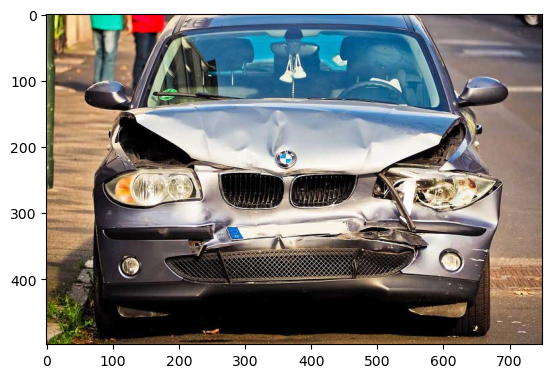

In [6]:
img = plt.imread('d:/datasets/dataset/predict/damaged.jpg')
plt.imshow(img)

In [25]:
if result[0][0] == 1:
    print('undamaged')
else:
    print('damaged')

damaged
